# IBM HR Analytics Employee Attrition & Performance

### In this notebook, I will try to predict if an employee whetever the employee is attrition or not

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

### Uploading and showing the data

In [82]:
data = pd.read_csv(r'C:\Users\meirk\Desktop\Ariel\semester A 1st year\data_sceince\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [83]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [84]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


My goal is to predict whetever the employee is attrition or not, so lets see how many employees are worn and how many are not worn:

In [85]:
how_many = data['Attrition'].value_counts()
how_many

No     1233
Yes     237
Name: Attrition, dtype: int64

In [86]:
no_precent = (how_many['No'] / len(data)) * 100
yes_precent = (how_many['Yes'] / len(data)) * 100
pd.DataFrame(data = {'No': [no_precent], 'Yes': [yes_precent]})

,No,Yes
0,83.877551,16.122449


As we can see, the majority of the employees, 1233 of them, which are 83.87% are not attrition, and only 237 of them, which are 16.12% are indeed attrition.

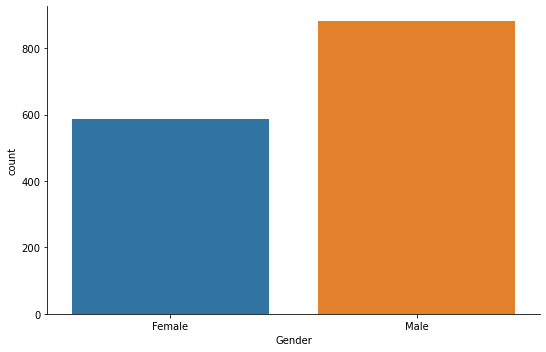

In [177]:
sns.catplot(data=data,kind='count',height=5,aspect=1.5,x='Gender')

In [223]:
att_f = len(data.loc[((data.Attrition == 'Yes') & (data.Gender == 'Female'))])
female = len(data['Gender'] == 'Female')
att_f_precent = (att_f / female) * 100
att_m = len(data.loc[((data.Attrition == 'Yes') & (data.Gender == 'Male'))])
Male = len(data['Gender'] == 'Male')
att_m_precent = (att_m / Male) * 100
pd.DataFrame({'Male attriton':[att_m_precent],'Female attrition':[att_f_precent]})

,Male attriton,Female attrition
0,10.204082,5.918367


Lets try to investigate the causes to the attrition of the employees.

The first possible factor might be the **distance from home:**

,DistanceFromHome
1,208
2,211
3,84
4,64
5,65
6,59
7,84
8,80
9,85
10,86


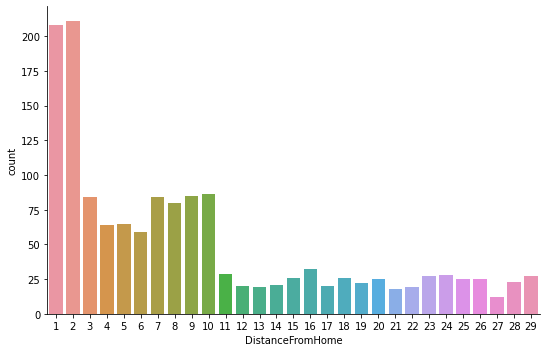

In [87]:
distance_df = pd.DataFrame(data['DistanceFromHome'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1.5,x='DistanceFromHome')
distance_df

In [88]:
for i in range(1,30):
    sum_ = len(data.loc[(data['DistanceFromHome'] == i) & (data['Attrition'] == 'Yes')])
    print("In category ", i,", ",sum_, "employees out of ", distance_df['DistanceFromHome'][i] ," are attrition")

In category  1 ,  26 employees out of  208  are attrition
In category  2 ,  28 employees out of  211  are attrition
In category  3 ,  14 employees out of  84  are attrition
In category  4 ,  9 employees out of  64  are attrition
In category  5 ,  10 employees out of  65  are attrition
In category  6 ,  7 employees out of  59  are attrition
In category  7 ,  11 employees out of  84  are attrition
In category  8 ,  10 employees out of  80  are attrition
In category  9 ,  18 employees out of  85  are attrition
In category  10 ,  11 employees out of  86  are attrition
In category  11 ,  4 employees out of  29  are attrition
In category  12 ,  6 employees out of  20  are attrition
In category  13 ,  6 employees out of  19  are attrition
In category  14 ,  4 employees out of  21  are attrition
In category  15 ,  5 employees out of  26  are attrition
In category  16 ,  7 employees out of  32  are attrition
In category  17 ,  5 employees out of  20  are attrition
In category  18 ,  4 employees

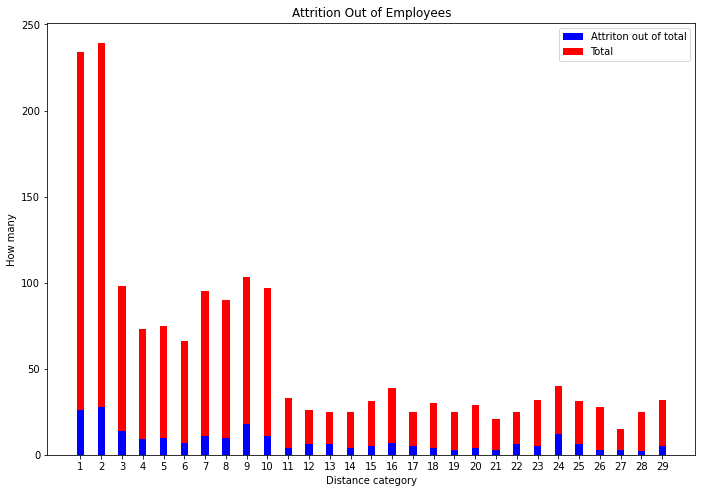

In [89]:
sum_list = []
for i in range(1,30):
    sum_ = len(data.loc[(data['DistanceFromHome'] == i) & (data['Attrition'] == 'Yes')])
    sum_list.append(sum_)
    
ind = np.arange(1,30)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(ind, np.array(sum_list), width, color = 'b')
ax.bar(ind, np.array(distance_df['DistanceFromHome']), width, bottom = np.array(sum_list), color = 'r')
ax.set_xticks(np.arange(1,30))
ax.set_ylabel("How many")
ax.set_xlabel("Distance category")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [224]:
pd.crosstab(columns=data.Attrition,index=data['DistanceFromHome'],margins=True,normalize='index')


Attrition,No,Yes
DistanceFromHome,,
1,0.875000,0.125000
2,0.867299,0.132701
3,0.833333,0.166667
4,0.859375,0.140625
5,0.846154,0.153846
6,0.881356,0.118644
7,0.869048,0.130952
8,0.875000,0.125000
9,0.788235,0.211765


Another possible factor might be the **relationship satisfaction of the employee:**

In [92]:
rel_list = []
for i in range(1,5):
    sum_ = len(data.loc[(data['RelationshipSatisfaction'] == i) & (data['Attrition'] == 'Yes')])
    rel_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",relation_df['RelationshipSatisfaction'][i] ," are attrition")

In category  1 ,  57 employees out of  276  are attrition
In category  2 ,  45 employees out of  303  are attrition
In category  3 ,  71 employees out of  459  are attrition
In category  4 ,  64 employees out of  432  are attrition


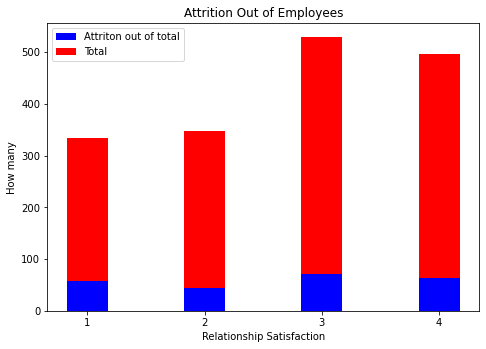

In [93]:
ind = [1,2,3,4]
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, np.array(rel_list), width, color = 'b')
ax.bar(ind, np.array(relation_df['RelationshipSatisfaction']), width, bottom = np.array(rel_list), color = 'r')
ax.set_xticks(np.arange(1,5))
ax.set_ylabel("How many")
ax.set_xlabel("Relationship Satisfaction")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [153]:
pd.crosstab(columns=data.Attrition,index=data['RelationshipSatisfaction'],margins=True,normalize='index')


Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Another possible factor might be a cause is the time that has passed since the **last promotion:**

,YearsSinceLastPromotion
0,581
1,357
2,159
3,52
4,61
5,45
6,32
7,76
8,18
9,17


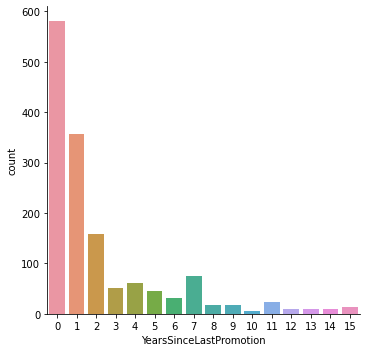

In [95]:
promotion_df = pd.DataFrame(data['YearsSinceLastPromotion'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1,x='YearsSinceLastPromotion')
promotion_df

In [96]:
pro_list = []
for i in range(len(promotion_df)):
    sum_ = len(data.loc[(data['YearsSinceLastPromotion'] == i) & (data['Attrition'] == 'Yes')])
    pro_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",promotion_df['YearsSinceLastPromotion'][i] ," are attrition")

In category  0 ,  110 employees out of  581  are attrition
In category  1 ,  49 employees out of  357  are attrition
In category  2 ,  27 employees out of  159  are attrition
In category  3 ,  9 employees out of  52  are attrition
In category  4 ,  5 employees out of  61  are attrition
In category  5 ,  2 employees out of  45  are attrition
In category  6 ,  6 employees out of  32  are attrition
In category  7 ,  16 employees out of  76  are attrition
In category  8 ,  0 employees out of  18  are attrition
In category  9 ,  4 employees out of  17  are attrition
In category  10 ,  1 employees out of  6  are attrition
In category  11 ,  2 employees out of  24  are attrition
In category  12 ,  0 employees out of  10  are attrition
In category  13 ,  2 employees out of  10  are attrition
In category  14 ,  1 employees out of  9  are attrition
In category  15 ,  3 employees out of  13  are attrition


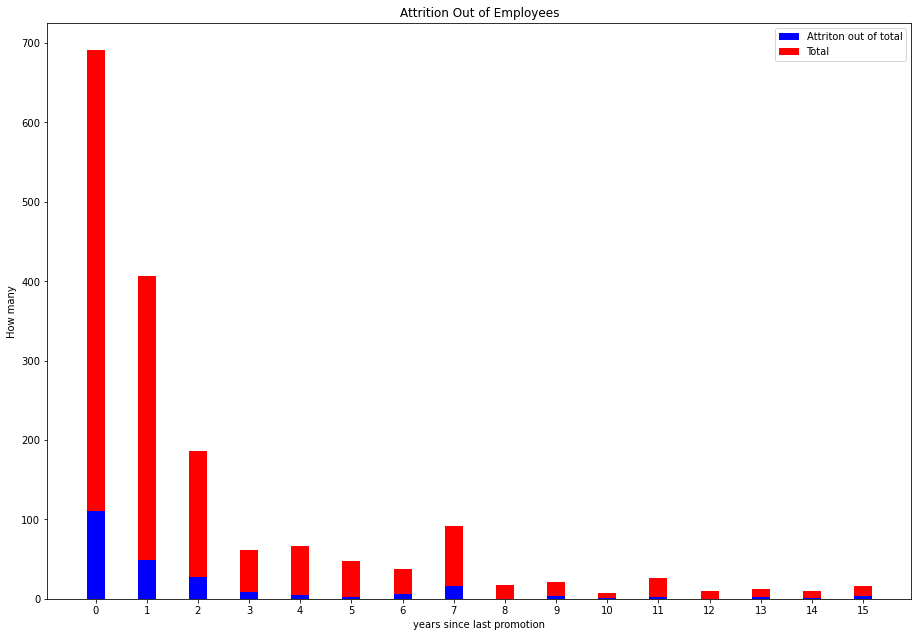

In [150]:
ind = np.arange(16)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ind, np.array(pro_list), width, color = 'b')
ax.bar(ind, np.array(promotion_df['YearsSinceLastPromotion']), width, bottom = np.array(pro_list), color = 'r')
ax.set_xticks(np.arange(0,16))
ax.set_ylabel("How many")
ax.set_xlabel("years since last promotion")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [149]:
pd.crosstab(columns=data.Attrition,index=data.YearsSinceLastPromotion,margins=True,normalize='index')

Attrition,No,Yes
YearsSinceLastPromotion,,
0,0.810671,0.189329
1,0.862745,0.137255
2,0.830189,0.169811
3,0.826923,0.173077
4,0.918033,0.081967
5,0.955556,0.044444
6,0.812500,0.187500
7,0.789474,0.210526
8,1.000000,0.000000


The last factor might be a cause is how many years the employee is working in his **current role:**

,YearsInCurrentRole
0,244
1,57
2,372
3,135
4,104
5,36
6,37
7,222
8,89
9,67


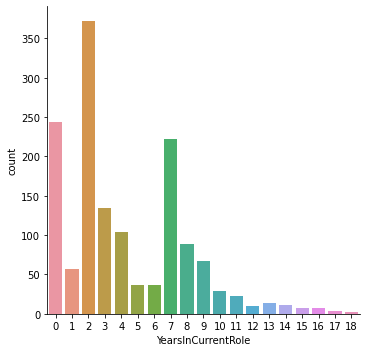

In [108]:
role_df = pd.DataFrame(data['YearsInCurrentRole'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1,x='YearsInCurrentRole')
role_df

In [100]:
role_list = []
for i in range(len(role_df)):
    sum_ = len(data.loc[(data['YearsInCurrentRole'] == i) & (data['Attrition'] == 'Yes')])
    role_list.append(sum_)
    print("In category ", i,", ",sum_, "employees out of ",role_df['YearsInCurrentRole'][i] ," are attrition")

In category  0 ,  73 employees out of  244  are attrition
In category  1 ,  11 employees out of  57  are attrition
In category  2 ,  68 employees out of  372  are attrition
In category  3 ,  16 employees out of  135  are attrition
In category  4 ,  15 employees out of  104  are attrition
In category  5 ,  1 employees out of  36  are attrition
In category  6 ,  2 employees out of  37  are attrition
In category  7 ,  31 employees out of  222  are attrition
In category  8 ,  7 employees out of  89  are attrition
In category  9 ,  6 employees out of  67  are attrition
In category  10 ,  2 employees out of  29  are attrition
In category  11 ,  0 employees out of  22  are attrition
In category  12 ,  1 employees out of  10  are attrition
In category  13 ,  1 employees out of  14  are attrition
In category  14 ,  1 employees out of  11  are attrition
In category  15 ,  2 employees out of  8  are attrition
In category  16 ,  0 employees out of  7  are attrition
In category  17 ,  0 employees o

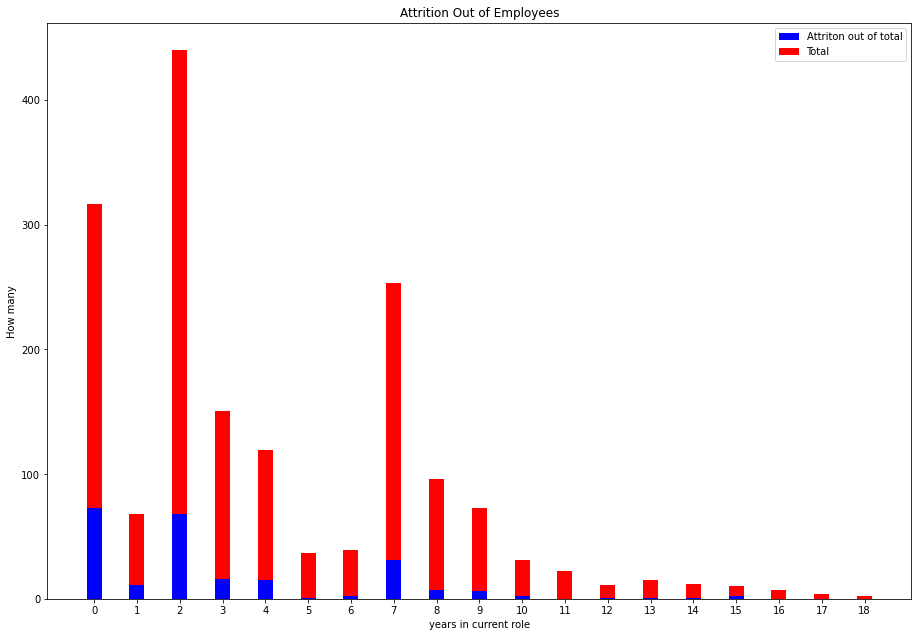

In [140]:
ind = np.arange(19)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ind, np.array(role_list), width, color = 'b')
ax.bar(ind, np.array(role_df['YearsInCurrentRole']), width, bottom = np.array(role_list), color = 'r')
ax.set_xticks(np.arange(0,19))
ax.set_ylabel("How many")
ax.set_xlabel("years in current role")
ax.set_title('Attrition Out of Employees')
ax.legend(labels = ['Attriton out of total','Total'])

In [148]:
pd.crosstab(columns=data.Attrition,index=data.YearsInCurrentRole,margins=True,normalize='index')

Attrition,No,Yes
YearsInCurrentRole,,
0,0.700820,0.299180
1,0.807018,0.192982
2,0.817204,0.182796
3,0.881481,0.118519
4,0.855769,0.144231
5,0.972222,0.027778
6,0.945946,0.054054
7,0.860360,0.139640
8,0.921348,0.078652


In conclusion:
* Men are more attrition than female.
* 5.91% Females are attrition, 10.2% males are attrition.
* There are some factors that can be a cause to attrition, i presented some of them (not all of them). 
* Distance from home does not have a high effect, the high majority in each category is not attrition.
* A bad relationship has a high effect on attrition.
* surprisingly,  the year that has passed since the last promotion does not have much effect.
* As opposed to the last section, we can see that working in the same role for several years raises the odds to be attrition. 

## Preparing the data to ML models

Encoding the categorical data:

In [227]:
def transform(feature):
    data[feature]=preprocessing.LabelEncoder().fit_transform(data[feature])
cat = data.select_dtypes(include='object')
for col in cat.columns:
    transform(col)

In [229]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [233]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [234]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [244]:
data.groupby('Attrition').mean()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1.0,1027.656123,2.771290,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1.0,1010.345992,2.464135,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1      49          0               1        279           1                 8   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
5      32          0               1       1005           1                 2   
6      59          0               2       1324           1                 3   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationF